In [3]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

%matplotlib inline

In [4]:
params = {
    "readout_lo_frequency": 7.2e9,
    "drive_lo_frequency": 5e9,
    "ext_lo": 11e9
}

### Resonator spectroscopy

2025-07-13 20:51:01,879 - INFO - Successfully connected to zi


[2025.07.13 20:51:01.886] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.07.13 20:51:01.886] INFO    VERSION: laboneq 2.54.0
[2025.07.13 20:51:01.892] INFO    Connecting to data server at localhost:8004
[2025.07.13 20:51:01.901] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.07.13 20:51:01.909] INFO    Configuring the device setup
[2025.07.13 20:51:01.917] INFO    The device setup is configured


2025-07-13 20:51:01,930 - INFO - Setting up instruments
2025-07-13 20:51:01,933 - INFO - Before exp


[2025.07.13 20:51:01.946] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.07.13 20:51:01.946] INFO    Starting LabOne Q Compiler run...
[2025.07.13 20:51:02.003] INFO    Schedule completed. [0.054 s]
[2025.07.13 20:51:02.162] INFO    Code generation completed for all AWGs. [0.158 s]
[2025.07.13 20:51:02.162] INFO    Completed compilation step 1 of 1. [0.215 s]
[2025.07.13 20:51:02.169] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.13 20:51:02.171] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.07.13 20:51:02.171] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.13 20:51:02.171] INFO      shfqc_0        0         21            0           1      8000  
[2025.07.13 20:51:02.171] INFO      shfqc_0_sg     0          9            1           0         0  
[2025.07.13 20:51:02.171] INFO     ─────────────────────────────────────────

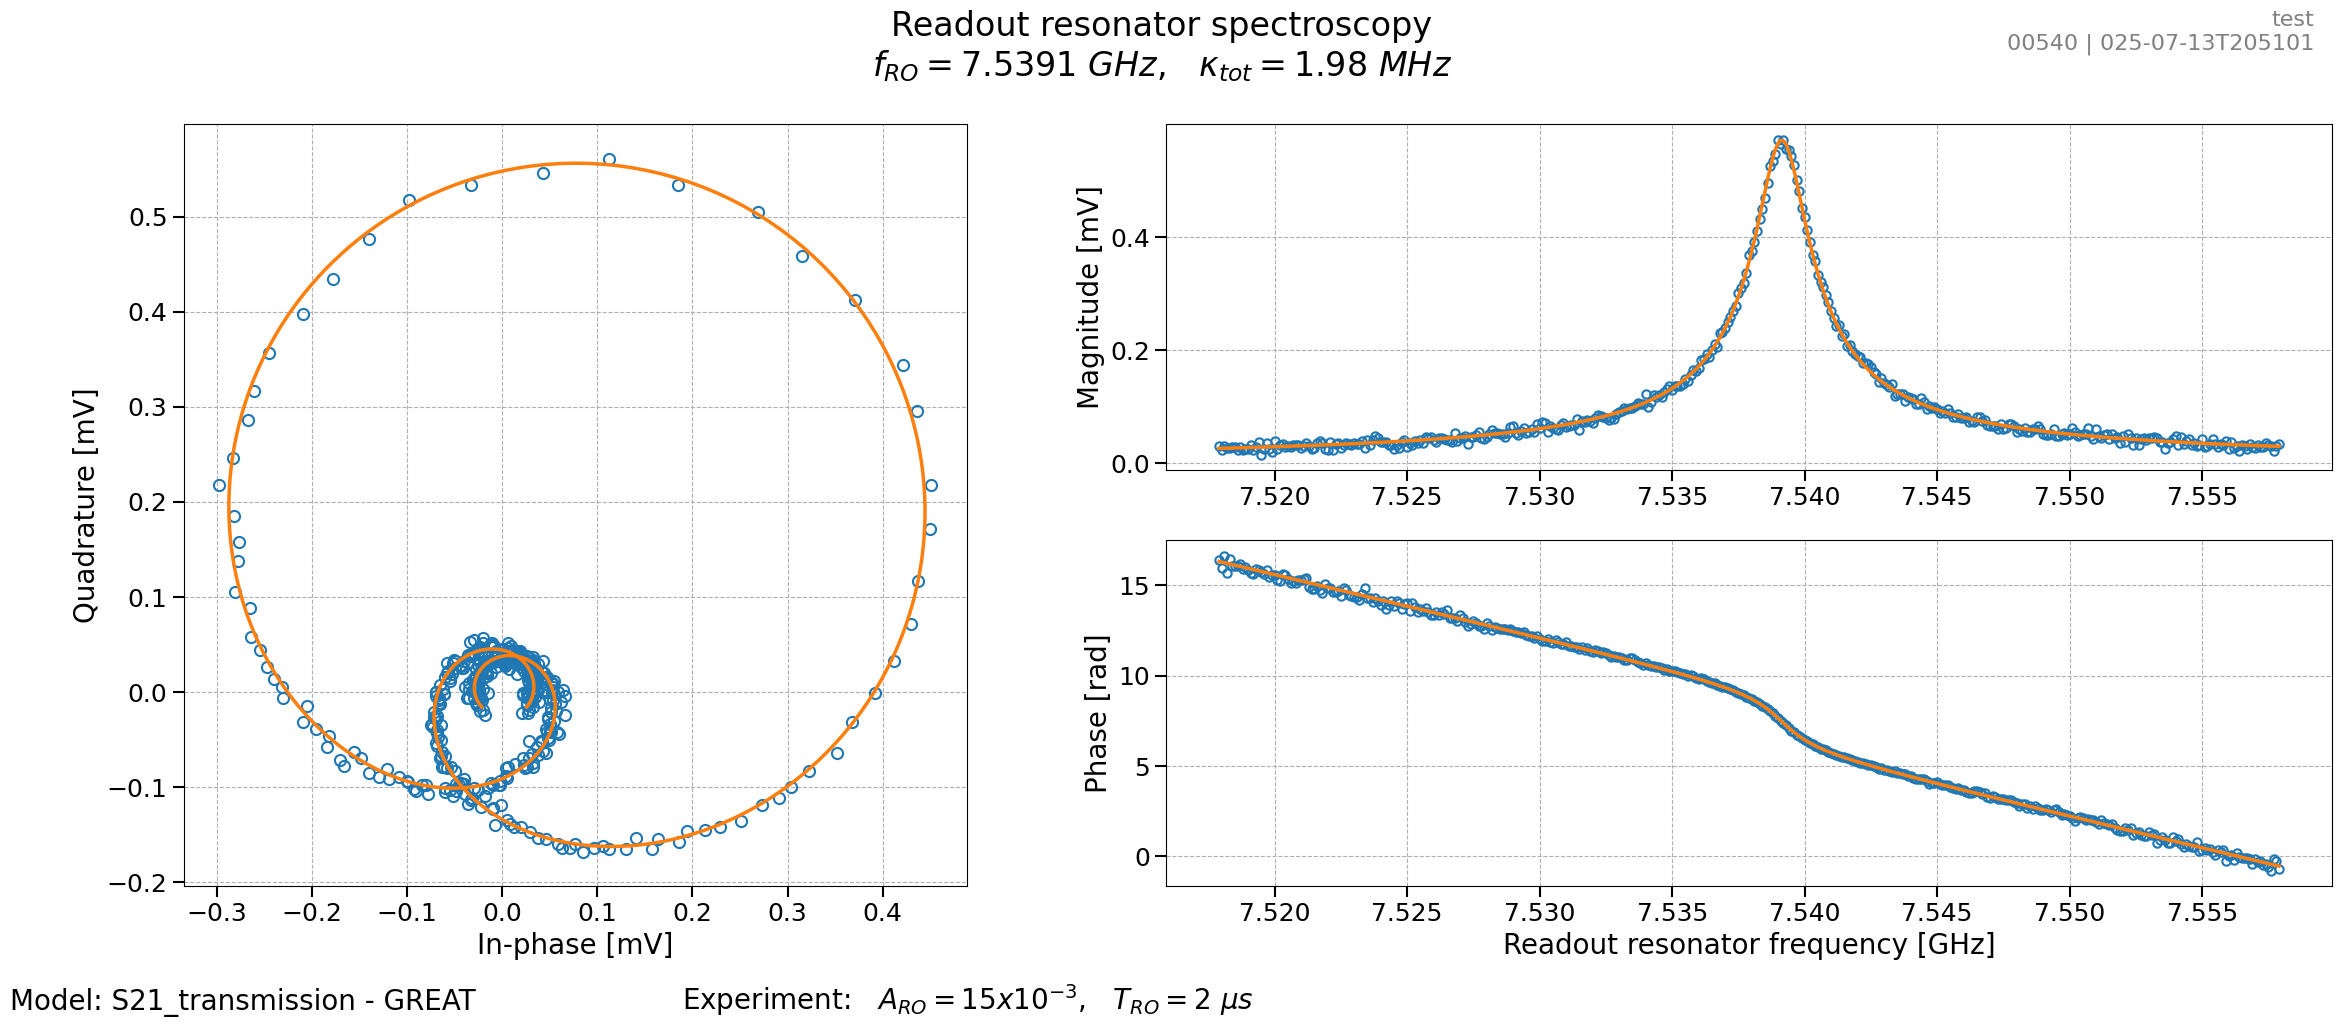

In [ ]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

ro_freq = 7.5379e9

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 400

result = rr_spec.run(
    rr_spec.sweep_around('readout_resonator_frequency')
    # np.linspace(ro_freq + 20e6, ro_freq - 20e6, 401),
    # sweeps={"readout_amplitude": np.linspace(0.003, 0.03, 10)},
    options=options,
)

### Qubit specroscopy

2025-07-13 16:38:41,694 - INFO - Successfully connected to zi


[2025.07.13 16:38:41.698] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.07.13 16:38:41.711] INFO    VERSION: laboneq 2.54.0
[2025.07.13 16:38:41.713] INFO    Connecting to data server at localhost:8004
[2025.07.13 16:38:41.716] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.07.13 16:38:41.724] INFO    Configuring the device setup
[2025.07.13 16:38:41.732] INFO    The device setup is configured


2025-07-13 16:38:41,741 - INFO - Setting up instruments
2025-07-13 16:38:41,743 - INFO - Before exp


[2025.07.13 16:38:41.762] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.07.13 16:38:41.762] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.07.13 16:38:41.762] INFO    Starting LabOne Q Compiler run...
[2025.07.13 16:38:41.961] INFO    Schedule completed. [0.198 s]
[2025.07.13 16:38:42.062] INFO    Code generation completed for all AWGs. [0.111 s]
[2025.07.13 16:38:42.078] INFO    Completed compilation step 1 of 1. [0.311 s]
[2025.07.13 16:38:42.079] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.13 16:38:42.079] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.07.13 16:38:42.079] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.13 16:38:42.079] INFO      shfqc_0        0         11            0           1      8000  
[2025.07.13 16:38:42.079] INFO      shfqc_0_

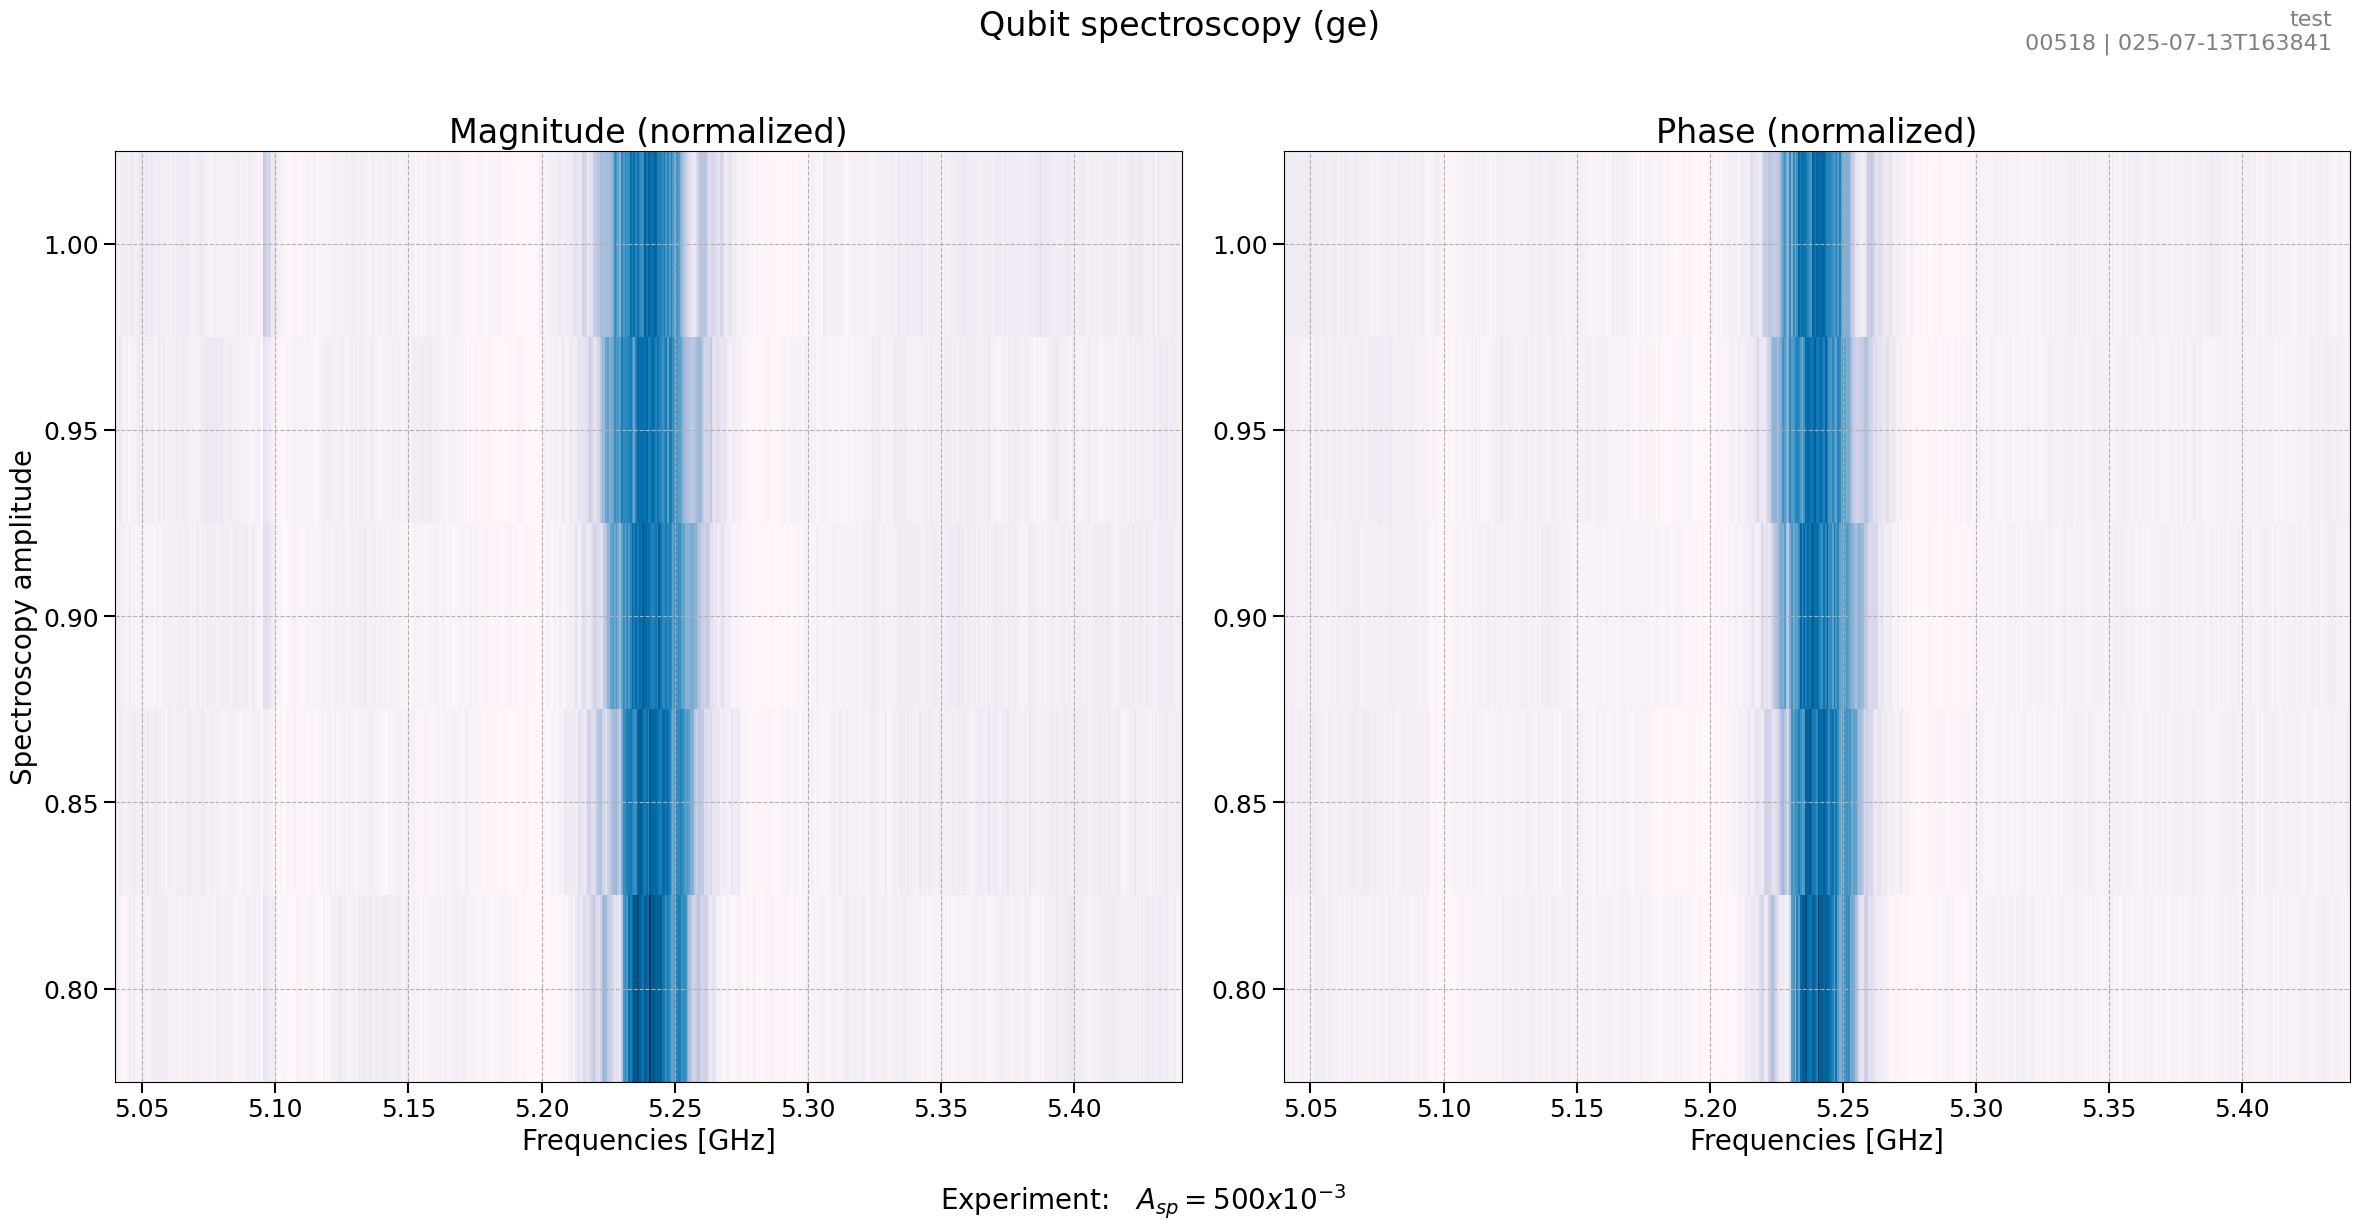

In [2]:
import numpy as np
from qu_spec import QuSpec, QuSpecOptions
from laboneq.dsl.enums import AveragingMode

qu_freq = 5.2402e9

qu_spec = QuSpec()
options = QuSpecOptions()
options.count = 1000
options.averaging_mode = AveragingMode.CYCLIC

result = qu_spec.run(
    np.linspace(qu_freq - 200e6, qu_freq + 200e6, 601),
    # sweeps={"spectroscopy_amplitude": np.linspace(0.8,1,5)},
    options=options,
)

### Time Rabi

2025-07-13 20:36:59,339 - INFO - Successfully connected to zi


[2025.07.13 20:36:59.339] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.07.13 20:36:59.339] INFO    VERSION: laboneq 2.54.0
[2025.07.13 20:36:59.339] INFO    Connecting to data server at localhost:8004
[2025.07.13 20:36:59.352] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.07.13 20:36:59.360] INFO    Configuring the device setup
[2025.07.13 20:36:59.360] INFO    The device setup is configured


2025-07-13 20:36:59,373 - INFO - Setting up instruments
2025-07-13 20:36:59,373 - INFO - Before exp


[2025.07.13 20:36:59.377] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.07.13 20:36:59.389] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.07.13 20:36:59.390] INFO    Starting LabOne Q Compiler run...
[2025.07.13 20:36:59.399] INFO    Schedule completed. [0.008 s]
[2025.07.13 20:36:59.407] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.07.13 20:36:59.407] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.07.13 20:36:59.407] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.07.13 20:36:59.423] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skip

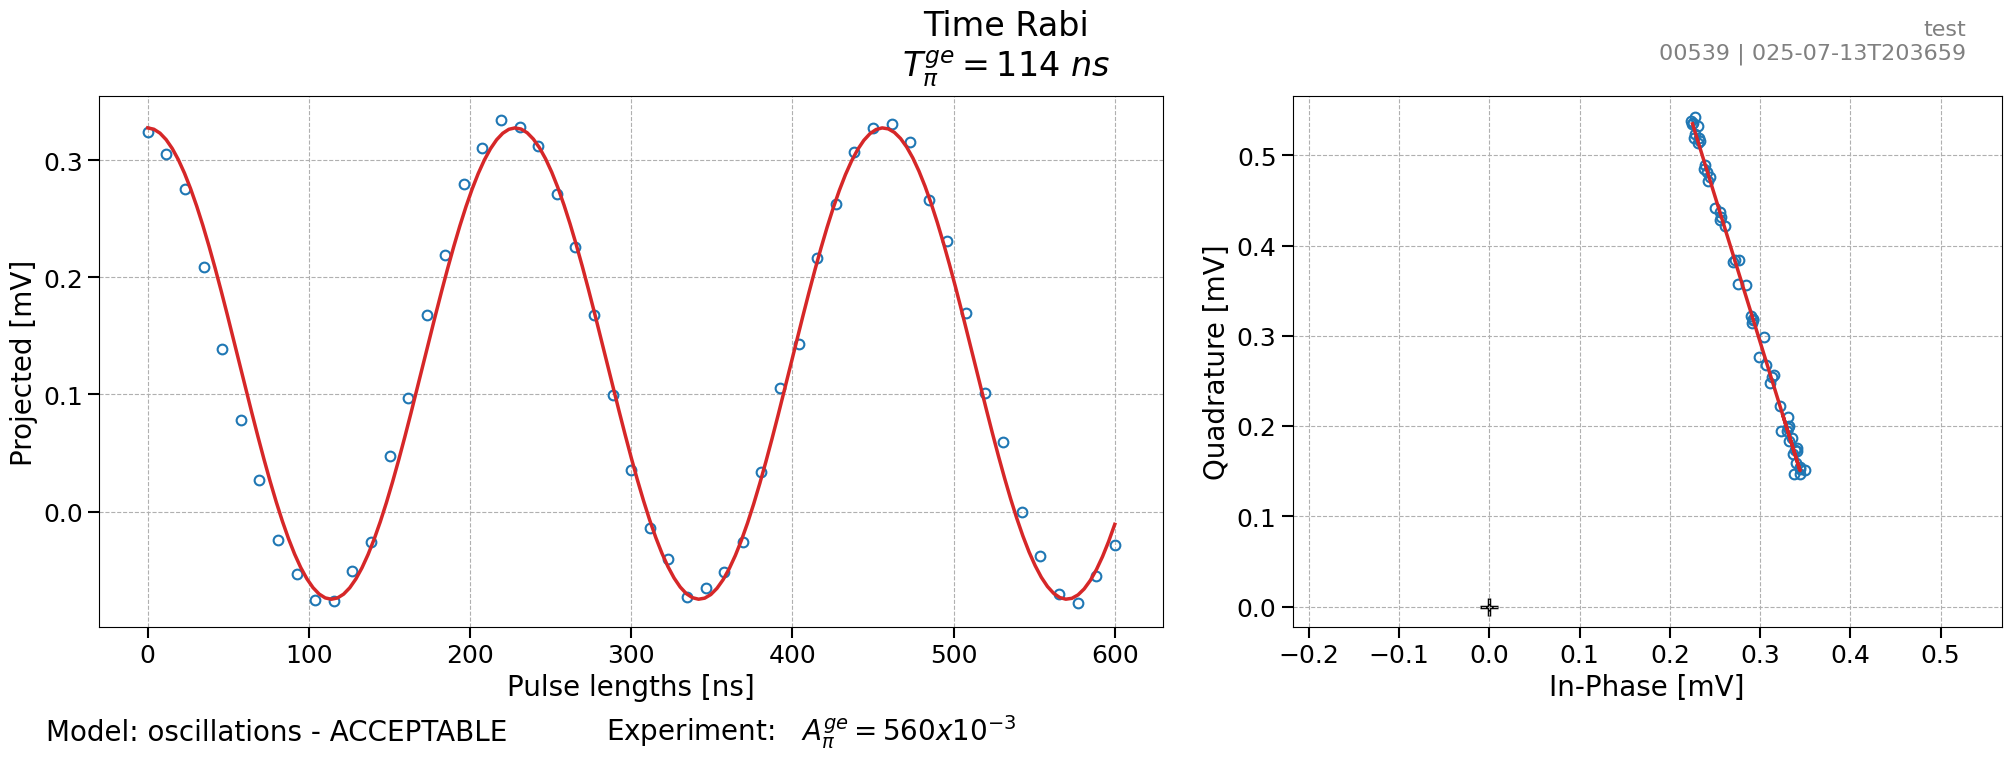

In [4]:
import numpy as np
from time_rabi import TimeRabi, TimeRabiOptions
from laboneq.dsl.enums import AcquisitionType, AveragingMode

qu_freq = 5.2402e9

time_rabi = TimeRabi()
options = TimeRabiOptions()
options.count = 2**8
options.acquisition_type = AcquisitionType.SPECTROSCOPY

result = time_rabi.run(
    np.linspace(1e-10, 600e-9, 53),
    # sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
    # sweeps={"resonance_frequency_ge": np.linspace(qu_freq-5e6, qu_freq+5e6, 11)},
    options=options,
)

### Tests

In [7]:
import numpy as np
10 + 20 * np.log10(0.56)

np.float64(4.963760540124009)

2025-07-13 10:01:37,883 - INFO - Successfully connected to zi


[2025.07.13 10:01:37.888] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.07.13 10:01:37.890] INFO    VERSION: laboneq 2.54.0
[2025.07.13 10:01:37.890] INFO    Connecting to data server at localhost:8004
[2025.07.13 10:01:37.895] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.07.13 10:01:37.906] INFO    Configuring the device setup
[2025.07.13 10:01:37.913] INFO    The device setup is configured


2025-07-13 10:01:37,915 - INFO - Setting up instruments
2025-07-13 10:01:37,917 - INFO - Before exp


[2025.07.13 10:01:37.931] INFO    Starting LabOne Q Compiler run...
[2025.07.13 10:01:37.983] INFO    Schedule completed. [0.050 s]
[2025.07.13 10:01:38.035] INFO    Code generation completed for all AWGs. [0.059 s]
[2025.07.13 10:01:38.035] INFO    Completed compilation step 1 of 1. [0.112 s]
[2025.07.13 10:01:38.035] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.13 10:01:38.035] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.07.13 10:01:38.035] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.13 10:01:38.050] INFO      shfqc_0        0         21            0           1      8000  
[2025.07.13 10:01:38.050] INFO      shfqc_0_sg     0          9            1           0         0  
[2025.07.13 10:01:38.052] INFO     ──────────────────────────────────────────────────────────────── 
[2025.07.13 10:01:38.053] INFO      TOTAL                    30            1                  8000 

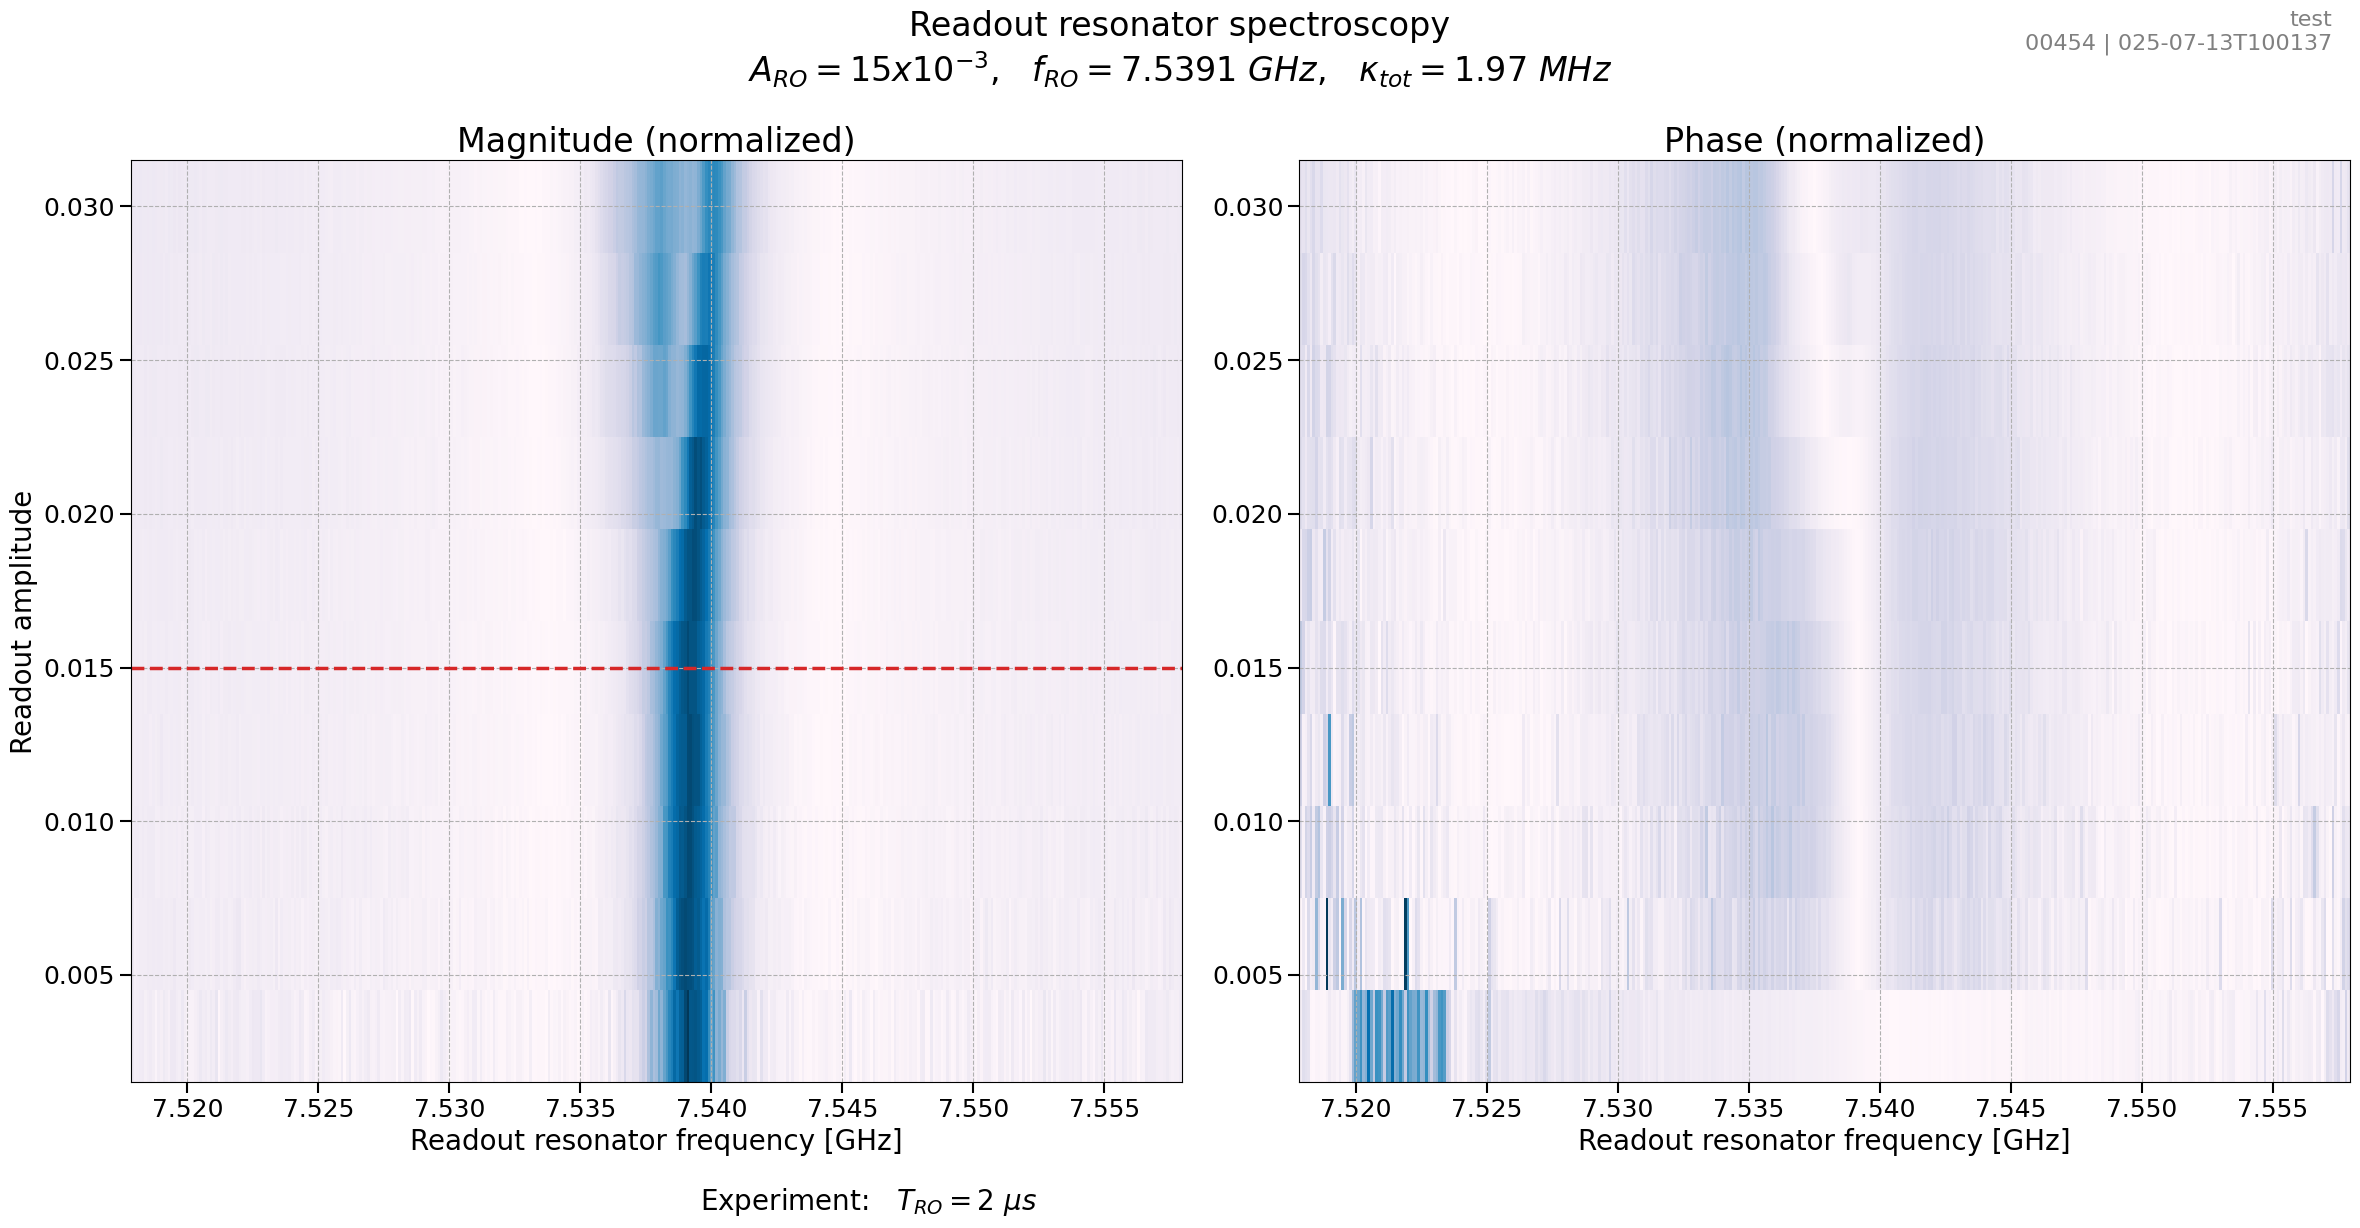

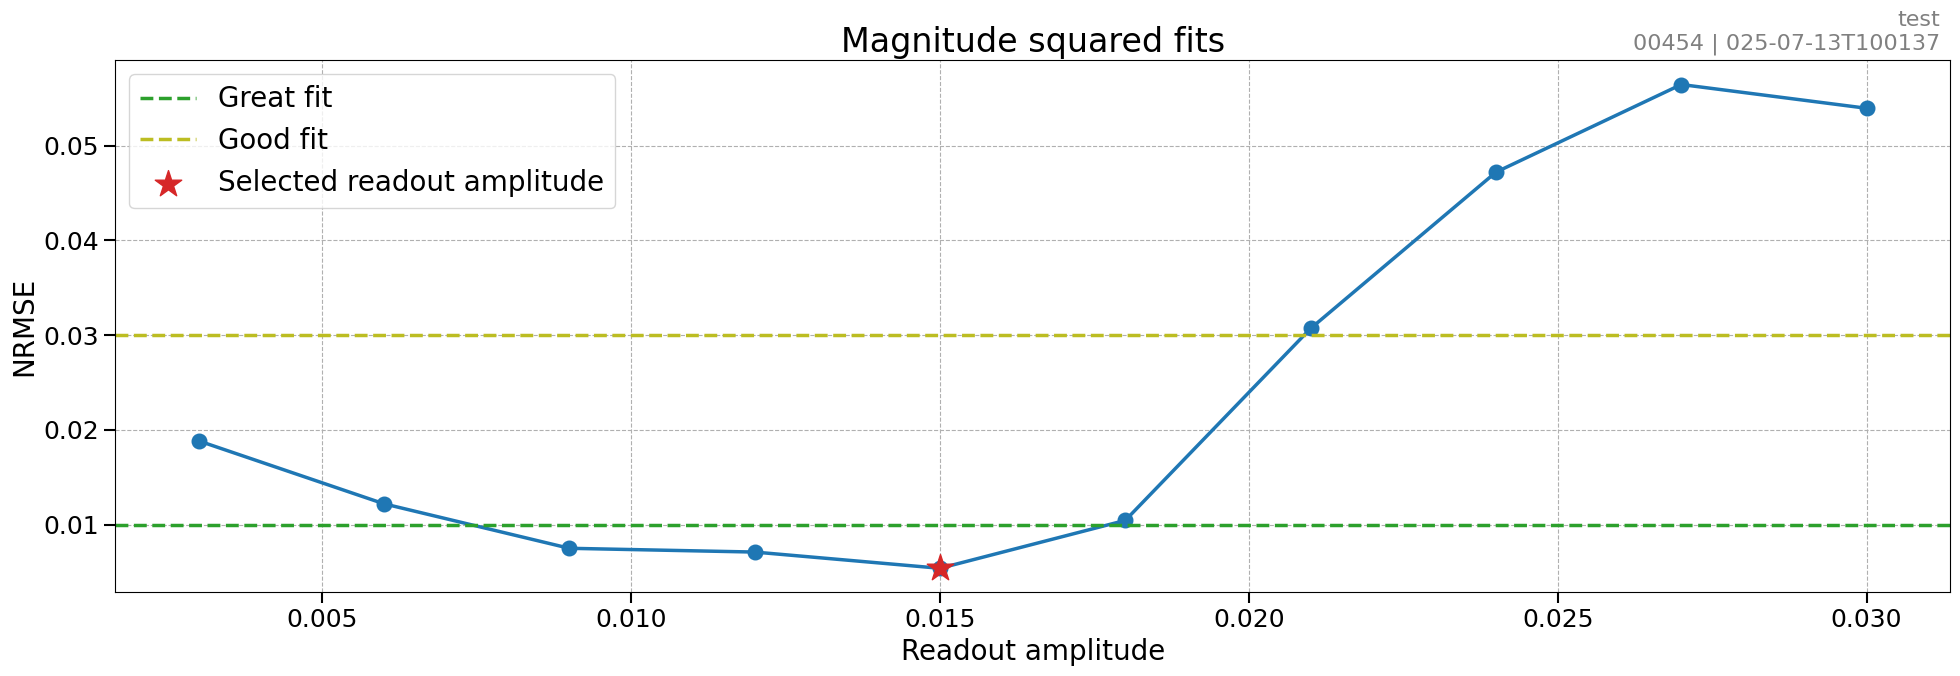

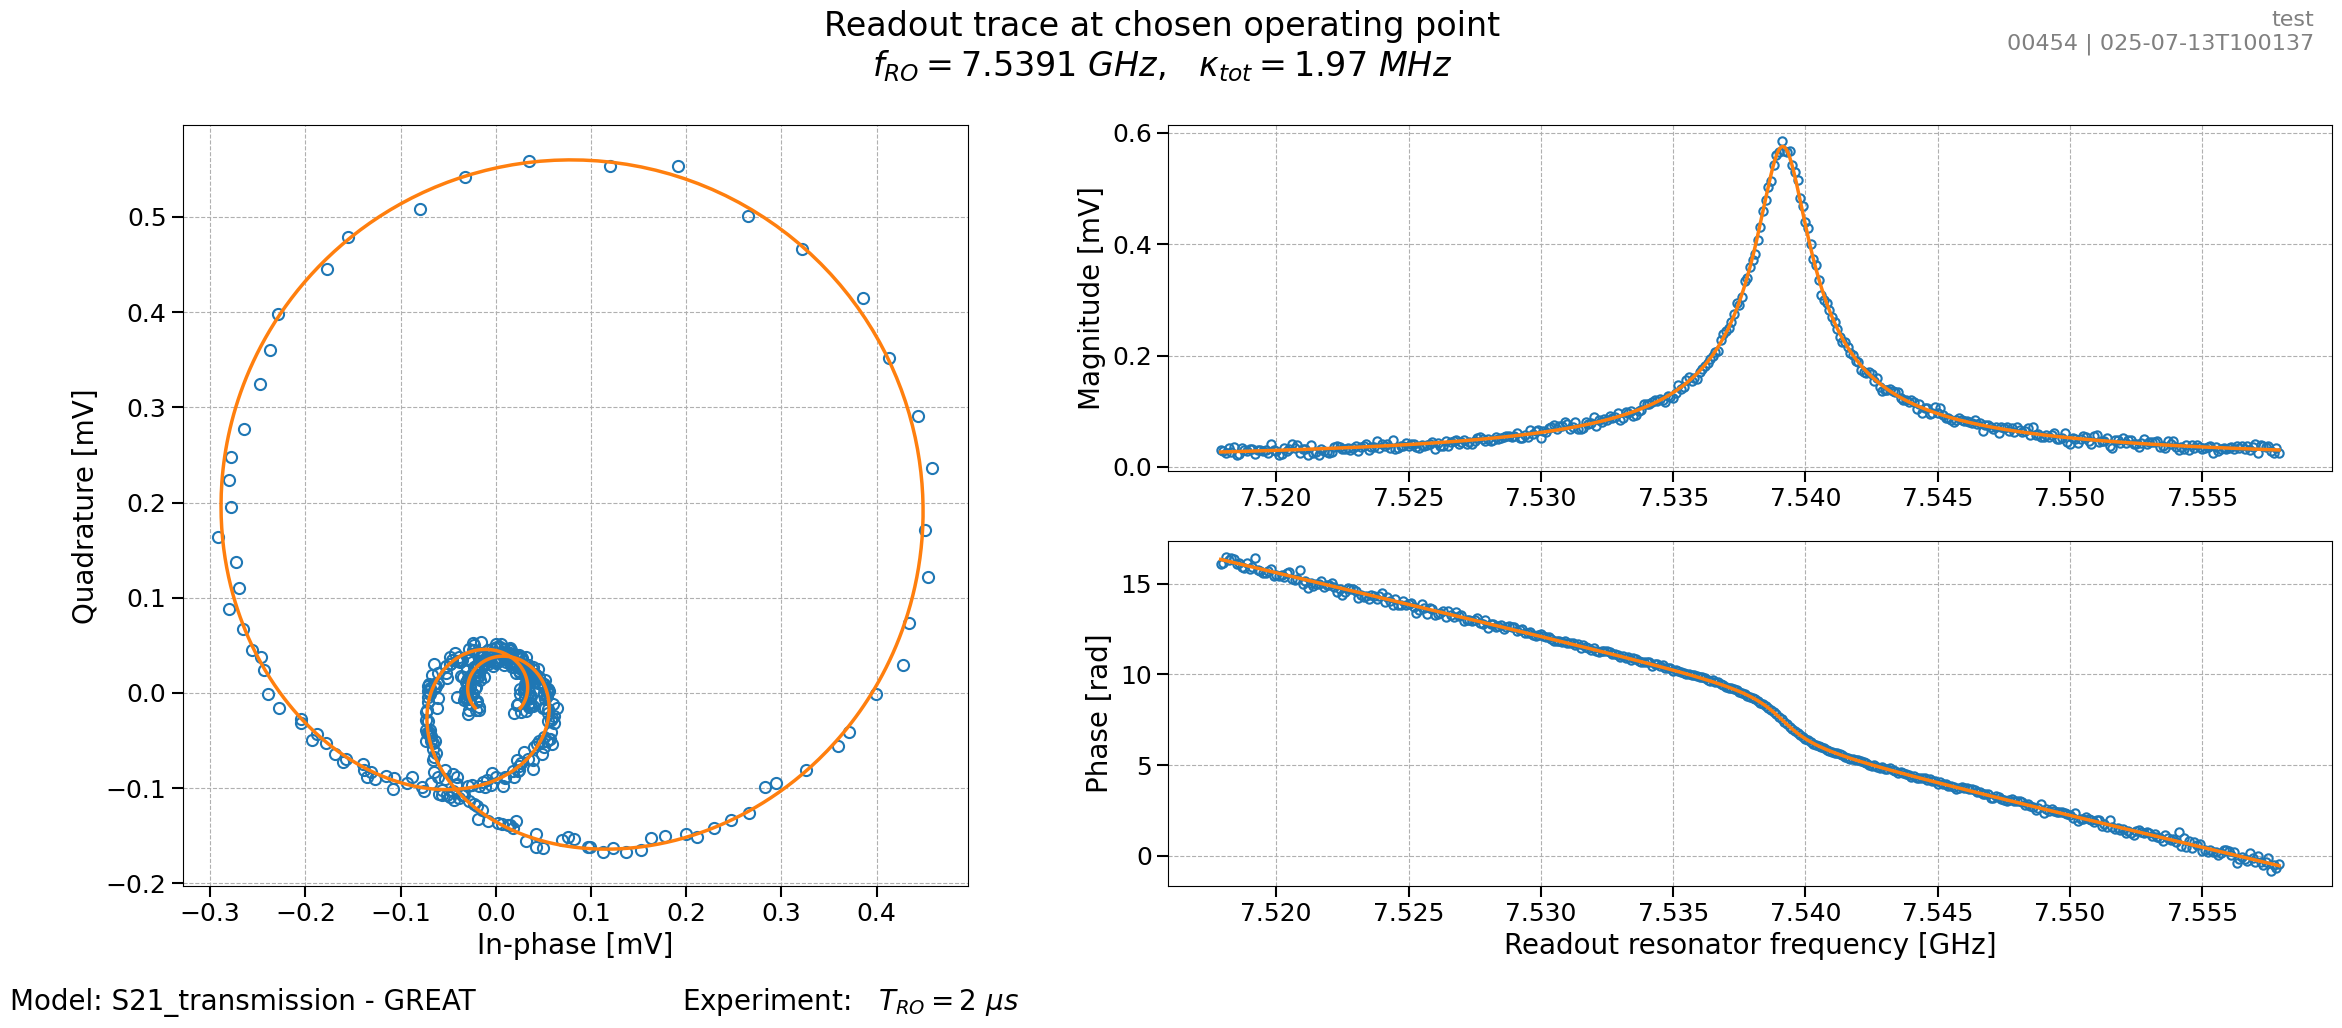

In [2]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

ro_freq = 7.5379e9

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 400

result = rr_spec.run(
    np.linspace(ro_freq + 20e6, ro_freq - 20e6, 401),
    sweeps={"readout_amplitude": np.linspace(0.003, 0.03, 10)},
    options=options,
)

average relative std: 0.45369850227250913
average std: 9.460869266857227e-05
std of the std: 1.3977359178516824e-05
relative std over std avg: 0.14773863568204568


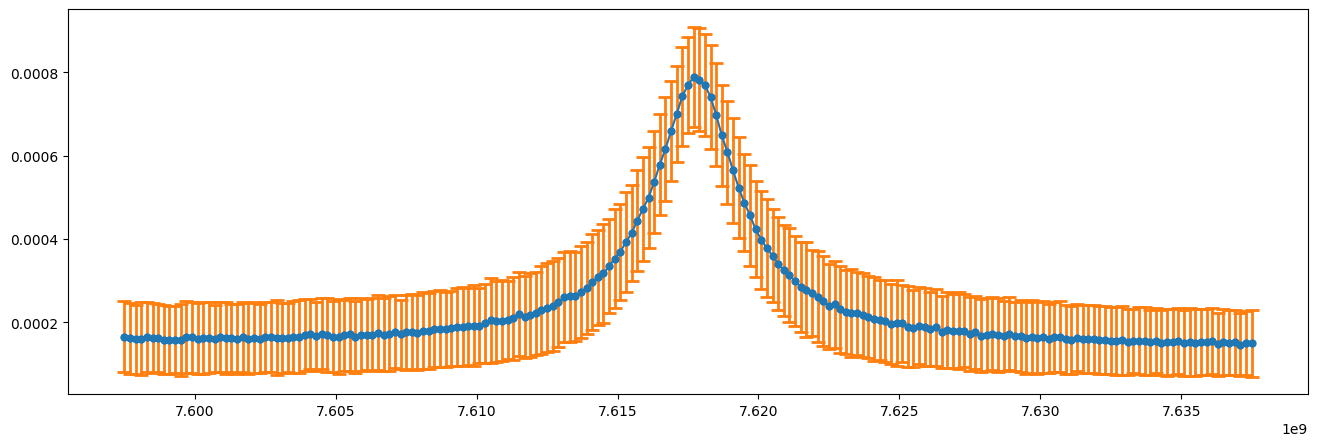

In [ ]:
import sqil_core as sqil
import matplotlib.pyplot as plt

# count = 2600
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00163-rr_spectroscopy_2025-05-14T012721"
# count = 1048
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00158-rr_spectroscopy_2025-05-14T012004"
# count = 200
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00165-rr_spectroscopy_2025-05-14T014453"
# count = 100
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00164-rr_spectroscopy_2025-05-14T012812"
# count = 2
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00159-rr_spectroscopy_2025-05-14T012109"

data, freq, sweep = sqil.extract_h5_data(
    path, ["data", "frequencies", "sweep0"]
)
linmag = np.abs(data[0])
print(
    "average relative std:", np.mean(np.std(linmag, axis=0) / np.mean(linmag, axis=0))
)
print("average std:", np.mean(np.std(linmag, axis=0)))
print("std of the std:", np.std(np.std(linmag, axis=0)))
print(
    "relative std over std avg:",
    np.mean(np.std(np.std(linmag, axis=0)) / np.mean(np.std(linmag, axis=0))),
)

plt.figure(figsize=(16, 5))
plt.errorbar(
    freq[0],
    np.mean(linmag, axis=0),
    np.std(linmag, axis=0),
    fmt="-o",
    color="tab:blue",
    label="Mean with Error",
    ecolor="tab:orange",
    capsize=5,
    capthick=2,
    elinewidth=2,
    markersize=5,
)
plt.show()

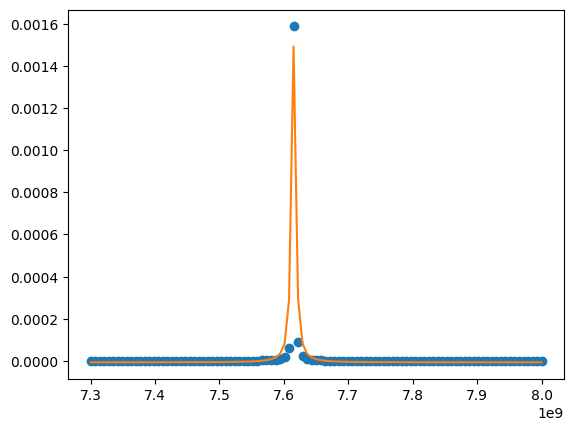

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-12\00011-rr spectroscopy_2025-05-12T231453"

data, freq = sqil.extract_h5_data(path, ["data", "frequencies"])

fit_res = sqil.fit.fit_lorentzian(freq, np.abs(data)**2)

plt.plot(freq, np.abs(data)**2, 'o')
plt.plot(freq, fit_res.predict(freq))
plt.show()

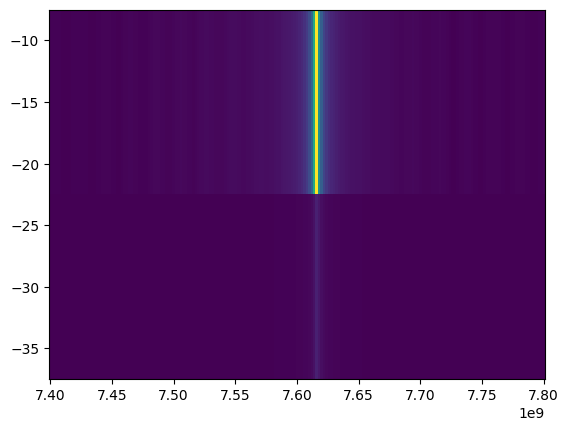

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-13\00029-rr spectroscopy_2025-05-13T005313"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

# for d, f, s in zip(data, freq, sweep):
#     plt.plot(f, np.abs(d), label=s)
# plt.legend()

plt.pcolormesh(freq[0], sweep, np.abs(data))

(201,) (2,) (2, 201)


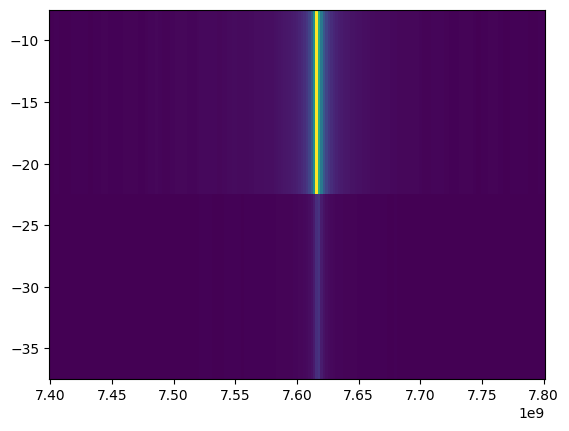

In [ ]:
path = r"Z:\Projects\BottomLoader\data\20250430_Transmon_20250207_multi_Fl_NbAl_N45\2025-05-13\00429-pulsed_onetone_vs_ro_power_2025-05-13T003736"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "ro_freq", "sweep_param"])
plt.pcolormesh(freq[0], sweep, np.abs(data))

print(freq[0].shape, sweep.shape, data.shape)

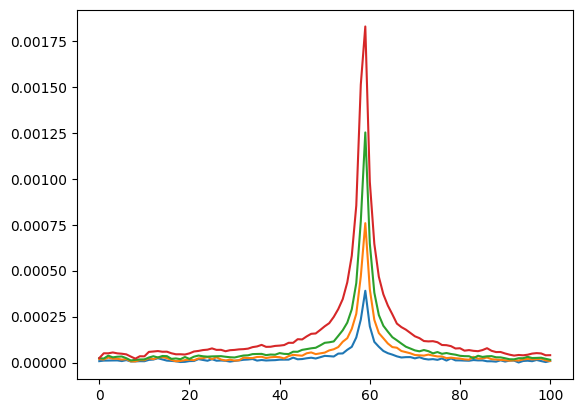

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-13\00126-rr spectroscopy_2025-05-13T222549"

data, freq, sweep0, sweep1 = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0", "sweep1"])

data.shape, freq.shape, sweep0.shape, sweep1.shape

plt.plot(np.abs(data).T)